In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

main_experiments_path = "../experiments"


basic_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp_0.01",
    "mlp_0.001",
    "mlp_0.0001",
    "rbf_full_0.01",
    "rbf_full_0.001",
    "rbf_full_0.0001",
    "rbf_diag_0.01",
    "rbf_diag_0.001",
    "rbf_diag_0.0001",
    "rbf_scal_0.01",
    "rbf_scal_0.001",
    "rbf_scal_0.0001",
    "rbf_univ_0.01",
    "rbf_univ_0.001",
    "rbf_univ_0.0001",
    "ffn_0.1_0.01",
    "ffn_0.1_0.001",
    "ffn_0.1_0.0001",
    "ffn_1_0.01",
    "ffn_1_0.001",
    "ffn_1_0.0001",
    "ffn_10_0.01",
    "ffn_10_0.001",
    "ffn_10_0.0001",
    "uffn_0.1_0.01",
    "uffn_0.1_0.001",
    "uffn_0.1_0.0001",
    "uffn_1_0.01",
    "uffn_1_0.001",
    "uffn_1_0.0001",
    "uffn_10_0.01",
    "uffn_10_0.001",
    "uffn_10_0.0001",
]


basic_condensed_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp",
    "rbf_full",
    "rbf_diag",
    "rbf_scal",
    "rbf_univ",
    "ffn",
    "uffn",
]

method_names = []
condensed_method_names = []
for i in range(4):
    method_names += [str(i+1)+"_"+method for method in basic_method_names]
    condensed_method_names += [str(i+1)+"_"+method for method in basic_condensed_method_names]


experiments_df = pd.DataFrame()


method_settings = os.listdir(main_experiments_path)

# sort by name

method_settings = sorted(method_settings)

#print all folders in the main experiments path
for method_setting in method_settings:
    #print(method_setting)
    # iterate over repetitions

    experiment_df = pd.DataFrame()

    if method_setting.startswith("."):
        continue

    for repetition in os.listdir(main_experiments_path + "/" + method_setting):
        #print(repetition)
        # iterate over files

        if repetition.startswith("."):
            continue

        ## add this repetition to the experiment df as column
        experiment_df[repetition] = None

        try:
            ## read the npy file
            train_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "train_loss.npy")
            val_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition +  "/data/"  + "val_loss.npy")
            test_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "test_loss.npy")
        except Exception as e:
            print("Error reading files for dataset: ", method_setting, e)
            continue
        
        ### extract the min val loss and pick the corresponding test loss

        min_val_loss = np.min(val_loss)
        min_val_loss_index = np.argmin(val_loss)

        min_test_loss = test_loss[min_val_loss_index]

    
        ## add the test loss to the experiment df
        experiment_df.loc["data",repetition] = min_test_loss

    print(experiment_df)

    ## order by dataset name
    experiment_df = experiment_df.sort_index()

    ## add a column which represents the mean of all repetitions
    experiment_df["mean"] = experiment_df.mean(axis=1)

    ## set mean to nan if there are any nans in the row
    experiment_df.loc[experiment_df.isnull().any(axis=1), "mean"] = np.nan

    ## add the experiment df to the experiments df
    experiments_df[method_setting] = experiment_df["mean"]


for i, method_name in enumerate(method_names):
    ## rename column experiment_000001 to method_names[0]
    exp_name = "experiment_" + str(i+1).zfill(6)
    experiments_df = experiments_df.rename(columns={exp_name: method_name})

experiments_df



     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data          2.598628          1.376937          6.354774          1.793045   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data          0.719654          0.347215         27.316465          2.338909  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data           61.2454         86.069543         71.753091        120.681524   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data         34.357359          28.69837        150.365492         50.590209  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data          0.537991          0.510777          0.435461          0.637292   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data          0.390881          0.466653          0.847524          0.134527  
     repetition_000003 repetition_000004 re

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_14049/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_14049/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_14049/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data        111.425827         74.415619        160.453049         94.352501   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data        170.674911          73.87545        298.103088          37.24551  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data        846.675659        704.952759       1324.516846       1076.903931   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data        943.856628       1014.046692       1721.882202        515.111938  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data        993.081238        577.255188       1647.383179        848.486694   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data        668.200317        719.063965       1807.557007       1246.920654  
     repetition_000003 repetition_000004 re

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_14049/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_14049/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_14049/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

,1_svr,1_pls,1_gradboost,1_mlp_0.01,1_mlp_0.001,1_mlp_0.0001,1_rbf_full_0.01,1_rbf_full_0.001,1_rbf_full_0.0001,1_rbf_diag_0.01,...,4_ffn_10_0.0001,4_uffn_0.1_0.01,4_uffn_0.1_0.001,4_uffn_0.1_0.0001,4_uffn_1_0.01,4_uffn_1_0.001,4_uffn_1_0.0001,4_uffn_10_0.01,4_uffn_10_0.001,4_uffn_10_0.0001
data,5.355704,75.470124,0.495138,0.528044,0.670467,33.589732,0.010799,0.03836,3.85771,0.010799,...,4643.232269,4767.772461,4697.536346,4655.095215,4662.476349,4635.346985,4613.492584,4674.566406,4592.708099,4548.66394


In [2]:
condensed_experiments_df = pd.DataFrame()

## iterate over the condensed method names and pick the min test loss for the corresponding methods 
for condensed_method in condensed_method_names:
    condensed_experiments_df[condensed_method] = experiments_df[[method for method in method_names if method.startswith(condensed_method)]].min(axis=1)

## set all None to nan
condensed_experiments_df = condensed_experiments_df.replace({None: np.nan})



### restructuring the dataframe to have the method names as columns and the indices as the rows the indices is the first part of the method name

condensed_experiments_df = condensed_experiments_df.T

condensed_experiments_df = condensed_experiments_df.reset_index()

condensed_experiments_df["method"] = condensed_experiments_df["index"].apply(lambda x: "_".join(x.split("_")[1:]))
condensed_experiments_df["index"] = condensed_experiments_df["index"].apply(lambda x: x.split("_")[0])


## plot the index as the rows and method as the columns

condensed_experiments_df = condensed_experiments_df.pivot(index="index", columns="method")

## drop the index

condensed_experiments_df.columns = condensed_experiments_df.columns.droplevel(0)


condensed_experiments_df

method,ffn,gradboost,mlp,pls,rbf_diag,rbf_full,rbf_scal,rbf_univ,svr,uffn
index,,,,,,,,,,
1,0.386928,0.495138,0.528044,75.470124,0.010799,0.010799,0.016416,0.003716,5.355704,0.087157
2,2.436708,19.174881,10.438630,269.065530,0.747945,0.747945,0.848466,4.048063,176.715199,1.197671
3,68.532252,556.833245,353.342649,1350.166613,141.185256,141.185256,118.389984,36.099507,1315.231675,112.703402
4,4618.757477,4644.861873,4652.055634,4715.380362,4714.756134,4714.756134,4718.348450,4434.177094,4626.090824,4548.663940


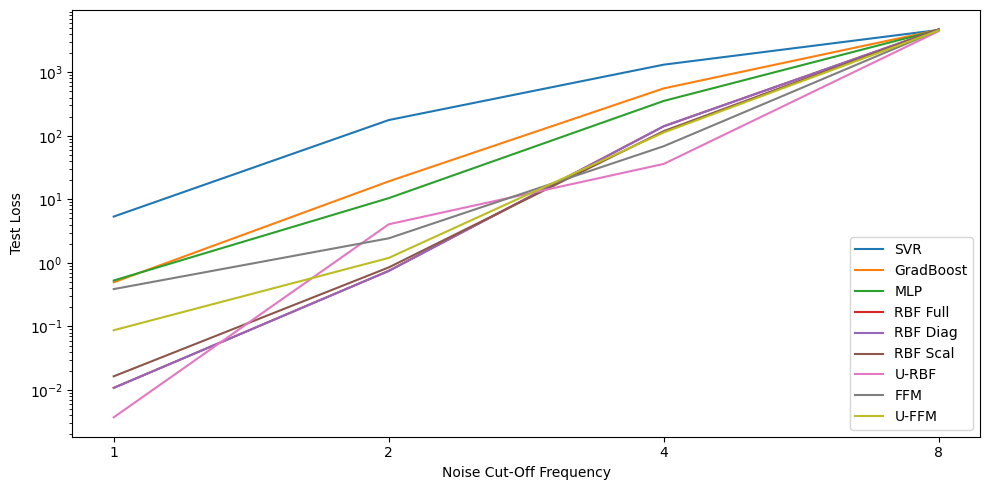

method,SVR,GradBoost,MLP,RBF Full,RBF Diag,RBF Scal,U-RBF,FFM,U-FFM
index,,,,,,,,,
1,5.355704,0.495138,0.528044,0.010799,0.010799,0.016416,0.003716,0.386928,0.087157
2,176.715199,19.174881,10.438630,0.747945,0.747945,0.848466,4.048063,2.436708,1.197671
3,1315.231675,556.833245,353.342649,141.185256,141.185256,118.389984,36.099507,68.532252,112.703402
4,4626.090824,4644.861873,4652.055634,4714.756134,4714.756134,4718.348450,4434.177094,4618.757477,4548.663940


In [4]:

renamed_experiments_df = condensed_experiments_df.copy()

method_renaming = {
    "svr": "SVR",
    #"pls": "PLS",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF Diag",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}

## rename the methods and exclude methods whose names are not in the method_renaming dict

renamed_experiments_df = renamed_experiments_df.rename(columns=method_renaming)
renamed_experiments_df = renamed_experiments_df[method_renaming.values()]


## plot the results in a line plot

plt.figure(figsize=(10,5))
plt.plot(renamed_experiments_df)
plt.legend(renamed_experiments_df.columns)


plt.xticks(range(renamed_experiments_df.shape[0]), [2**(int(setting) - 1 )  for setting in renamed_experiments_df.index])

plt.xlabel("Noise Cut-Off Frequency")
plt.ylabel("Test Loss")

# scale the y-axis to log

plt.yscale("log")

plt.tight_layout()
plt.show()


renamed_experiments_df